<div dir='rtl'>
    <h1> סעיף א':</h1>
<p>נגדיר גרף שבו כל קודקוד ממושקל המסמן את מספר הנפשות במשפחה של אותו קודקוד וכן לכל קדקוד סוג דם של התורם והנתרם.</p>
<ul>
<li>כל צלע מחוברת בין 2 קדקודים תסמן התאמה פוטנציאלית, וכן משקל שהוא חיבור 2 המשקלים של הקדקודים היוצרים את הצלע.</li>
<li>נמצא שידוך בגרף, ונעשה זאת תחת אילוץ שמשקל הצלעות בכל שידוך יהיה מקסימלי.</li>
<li>השתמשתי בקוד ב-max_weight_matching שמבוסס על blossom algorithm למציאת מספר מקסימלי של שידוכים בגרף של ג'ק אדמונדס, וכן משלב אלגוריתם נוסף שלו למציאת שידוכים בעל משקל מקסימלי בגרף. הוא עושה את עקרון האלגוריתם, שזה מציאת שידוך מקסימלי כאשר כל שידוך הוא שידוך בעל משקל מקסימלי.</li>
</ul>
</div>

<div dir='rtl'>
    <h1> סעיף ב':</h1>
</div>
<a href="https://ibb.co/rtSY3bL"><img src="https://i.ibb.co/sPGnC5D/soleconomics.png" alt="soleconomics" border="0"></a>

In [108]:
import matplotlib.pyplot as plt
import networkx as nx
G = nx.Graph()
G.add_edge('A','B' ,weight=11)
G.add_edge('A','C',weight=13)
G.add_edge('A','E' ,weight=9)
G.add_edge('B','C' ,weight=16)
G.add_edge('B','D' ,weight=8)
G.add_edge('C','E' ,weight=14)
G.add_edge('D','E' ,weight=5)
print(":Matches")
print(nx.max_weight_matching(G))

:Matches
{('C', 'E'), ('A', 'B')}


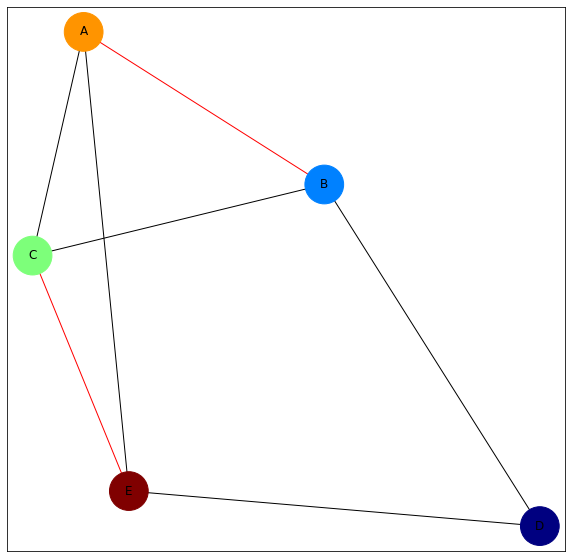

In [109]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.pyplot import figure

#let us print the graph
figure(num=None, figsize=(10, 10))

G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('A', 'E'), ('B', 'D'), ('C', 'E'),
     ('D', 'E')])

#drawing and printing the graph

#color val_map
val_map = {'A': 0.75,
           'B': 0.25,
           'C': 0.50,
           'D': 0.0,
           'E': 1.0,
           }

values = [val_map.get(node, 0.25) for node in G.nodes()]

red_edges = [('A', 'B'), ('C', 'E')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 1500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)


plt.show()

:Matches
{('A', 'C'), ('D', 'B')}


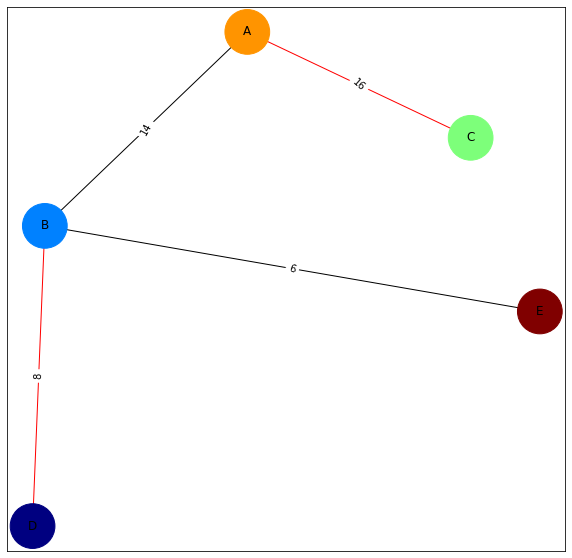

In [107]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.pyplot import figure

#Another example made by me.
figure(num=None, figsize=(10, 10))

#Every person has own blood type (bType).
#Every person knows the blood type of his friend willing to donate in the exchnge (obType).
#Every person has a number of siblings as weight.
class Person:
  def __init__(self, name, siblings, bType, obType):
    self.name=name
    self.siblings=siblings
    self.bType=bType
    self.obType=obType  
    
A=Person("A",9,"a","o")
B=Person("B",5,"b","a") 
C=Person("C",7,"ab","a") 
D=Person("D",3,"a","b") 
E=Person("E",1,"a","b") 

G = nx.Graph()

set={A,B,C,D,E}

#For every node, add an edge with a weight as the number of total siblings.
#If obType is O than he can allways donate if the match is correct.
for val in set:
    for val2 in set:
        if val2.name!=val.name:
            if (val.bType==val2.obType and val2.bType==val.obType) or (val2.obType=="o" and val2.bType==val.obType) :
                G.add_edge(val.name,val2.name ,weight=val.siblings+val2.siblings)

print(":Matches")
print(nx.max_weight_matching(G))    

#drawing and printing graph
values = [val_map.get(node, 0.45) for node in G.nodes()]
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])

red_edges = [('A', 'C'), ('B', 'D')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 2000)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()